In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("./day08_data.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
#删除列
data.drop(["Name","Ticket","Cabin"],inplace=True,axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [18]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [22]:
#删除缺失值 
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [28]:
#将Embarked更改成数字
labels=data["Embarked"].unique().tolist()
data["Embarked"]=data["Embarked"].apply(lambda x:labels.index(x))

In [29]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [32]:
sex_labels=data["Sex"].unique().tolist()
data["Sex"]=data["Sex"].apply(lambda x:sex_labels.index(x))

In [33]:
data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0
887,888,1,1,1,19.000000,0,0,30.0000,0
888,889,0,3,1,29.699118,1,2,23.4500,0
889,890,1,1,0,26.000000,0,0,30.0000,1


In [38]:
data.loc[:,"Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 889, dtype: int64

In [39]:
#将x,y分离开
x=data.loc[:,data.columns!="Survived"]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,3,1,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,0
888,889,3,1,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1


In [40]:
y=data.loc[:,data.columns=="Survived"]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [46]:
from  sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
#由于train_x,test_x,train_y,test_y是乱序的，所以要给他按照之前的索引排好序
for i in [train_x,test_x,train_y,test_y]:
    i.index=range(i.shape[0])


In [70]:
#开始构建模型
clf=DecisionTreeClassifier(random_state=25)
clf=clf.fit(train_x,train_y)
clf.score(test_x,test_y)

0.7503447395301327

In [69]:
from sklearn.model_selection import cross_val_score
clf=DecisionTreeClassifier(random_state=25)
cross_val_score(clf,x,y,cv=10).mean()

0.7503447395301327

0.8166624106230849


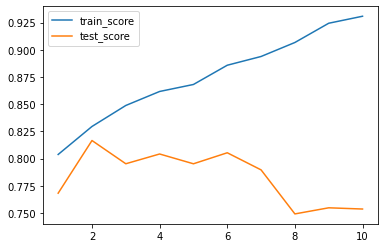

In [75]:
train=[]
test=[]
for i in range(1,11):
    clf=DecisionTreeClassifier(random_state=25
                              ,max_depth=i+1
                              ,criterion="entropy"
                              )
    clf=clf.fit(train_x,train_y)
    train.append(clf.score(train_x,train_y))
    test.append(cross_val_score(clf,x,y,cv=10).mean())
print(max(test))
plt.plot(range(1,11),train,label="train_score")
plt.plot(range(1,11),test,label="test_score")
plt.legend()
plt.show()

In [83]:
'''
由于里面的参数非常多，所以不适合一个一个的调整，故使用网格搜索,
GridSearchCV包含了score,fit,交叉验证
'''
import numpy as np
paramaters={
    "criterion":("gini","entropy")
    ,"splitter":("best","random")
    ,"max_depth":[*range(1,10)]
    ,"min_samples_leaf":[*range(1,50,5)]
    ,"min_impurity_decrease":[*np.linspace(0,0.5,20)]
}
clf=DecisionTreeClassifier(random_state=25)
GS=GridSearchCV(clf,paramaters,cv=10)
GS=GS.fit(train_x,train_y)

In [84]:
GS.best_params_#从我们输入的参数和参数取值的列表中，返回最佳的组合

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [86]:
GS.best_score_

0.8343317972350229